# Visualizing Loans Awarded by Kiva

In this project you'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, you'll explore the average loan amount by country using aggregated bar charts. You'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

Some of the steps below will have  hints that you can access if you need them. Hints will look like this:
<br>
<br>
<details>
<summary>Hint (click me)</summary>
<br>
I'm a hint!
<br>
</details>

**A Note On `plt.show()`:** You may be used to displaying your plots using the code `plt.show()`. This IPython Jupyter notebook removes the necessity of calling `plt.show()` after each plot. You should be able to render your Seaborn plots simply by running the cell with the code for your plot. If you have issues rendering your plot you can try adding `plt.show()` to a cell.

## Step 1: Import Necessary Python Modules
Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [51]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Step 2: Ingest The Data
Load **kiva_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
Use `pd.read_csv()`.
<br>
</details>

In [52]:
df = pd.read_csv("kiva_data.csv")
print(df.head())

   loan_amount               activity   country  gender
0          625  Food Production/Sales  Pakistan  female
1          250  Food Production/Sales  Pakistan  female
2          400  Food Production/Sales  Pakistan  female
3          400  Food Production/Sales  Pakistan  female
4          500  Food Production/Sales  Pakistan  female


## Step 3: Examine The Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project download folder.

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 


Print the first 25 rows of `df` using `.head()`

In [53]:
print(df.head(25))

    loan_amount               activity   country  gender
0           625  Food Production/Sales  Pakistan  female
1           250  Food Production/Sales  Pakistan  female
2           400  Food Production/Sales  Pakistan  female
3           400  Food Production/Sales  Pakistan  female
4           500  Food Production/Sales  Pakistan  female
5           500  Food Production/Sales  Pakistan  female
6           400  Food Production/Sales  Pakistan  female
7           500  Food Production/Sales  Pakistan  female
8           400  Food Production/Sales  Pakistan  female
9           450  Food Production/Sales  Pakistan  female
10          250  Food Production/Sales  Pakistan  female
11          300  Food Production/Sales  Pakistan  female
12          275  Food Production/Sales  Pakistan  female
13          425  Food Production/Sales  Pakistan  female
14          425  Food Production/Sales  Pakistan  female
15          475  Food Production/Sales  Pakistan  female
16          225  Food Productio

## Step 4: Bar Charts

Create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

We've set up the figure you'll use to plot your bar plot on. The `f` variable gives us access to the figure and `ax` gives us access to the axes.

Use `sns.barplot()` with the following arguments:

- `data` set to `df`
- `x` set to `country`
- `y` set to `loan_amount`

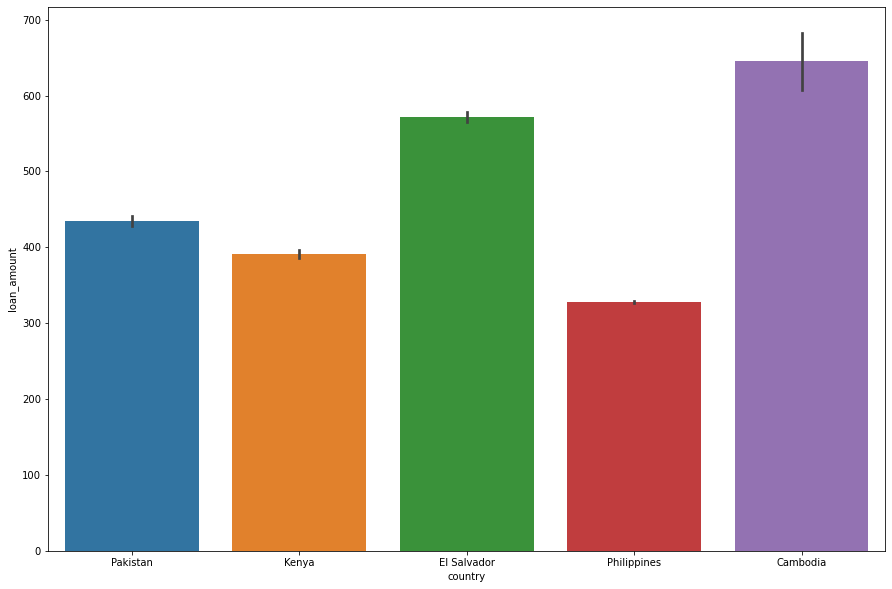

In [54]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df, x='country', y='loan_amount')

### Adding `$` units

You can use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

Run the code in the cell below to see the `$` in action.

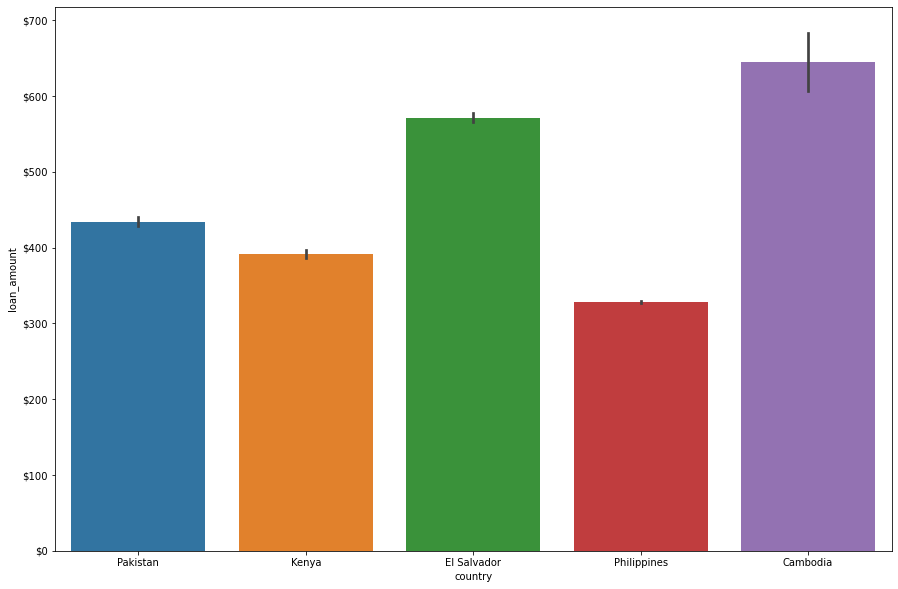

In [55]:
import matplotlib.ticker as mtick

# Creates the figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the data
sns.barplot(data=df, x="country", y = "loan_amount")

# Use part of the code above to format the y-axis ticks below this line
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)



## Step 5: Learn More By Using `hue` In Your Visualization

You can visualize even more data on one bar plot by visualizing the loan amount by country, and "nesting" by gender. Add the `hue` parameter to your `sns.barplot()` and set it so that the visualization includes the nested category of gender.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
Set `hue` equal to the column name `gender`.
<br>
</details>

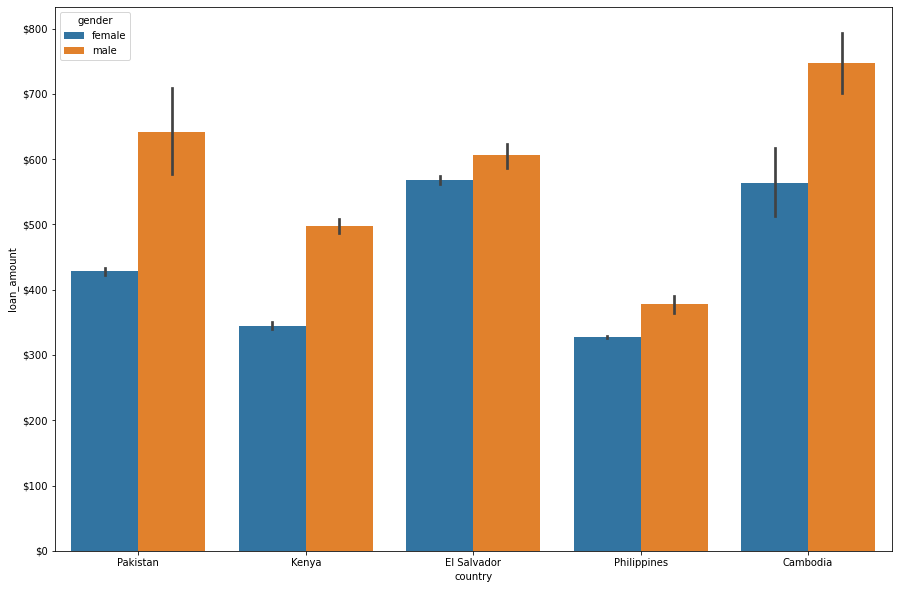

In [56]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x="country", y="loan_amount", hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#### Reflection Questions

On average, do female or male recipients receive larger loans from Kiva?

In [57]:
df_average = df.groupby(['country', 'gender']).loan_amount.mean().reset_index()
print(df_average)

# Male recipients recieves larger amount of loans from kiva

       country  gender  loan_amount
0     Cambodia  female   562.903226
1     Cambodia    male   747.000000
2  El Salvador  female   567.454380
3  El Salvador    male   605.599711
4        Kenya  female   345.028323
5        Kenya    male   497.681966
6     Pakistan  female   427.987875
7     Pakistan    male   642.129630
8  Philippines  female   327.199599
9  Philippines    male   377.699663


Which country has the *least* disparity in loan amounts awarded by gender?

In [60]:
df_least = df.groupby(['gender', 'country']).loan_amount.min().reset_index()
print(df_least)

# Male = kenya, Female = Philippines/kenya

   gender      country  loan_amount
0  female     Cambodia          100
1  female  El Salvador          100
2  female        Kenya           50
3  female     Pakistan          100
4  female  Philippines           50
5    male     Cambodia          225
6    male  El Salvador          100
7    male        Kenya           50
8    male     Pakistan          200
9    male  Philippines           75


Based on the data, what kind of recommendations can you make to Kiva about the loans they give?

What actions could be taken to implement the recommendations you've made?

In [ ]:
# Increase the amount of loans given to the female gender and increase amount of female genders given the loan

## Step 6: Styling


Set a different color palette using `sns.set_palette()`. You can use any of the Color Brewer qualitative color palettes:

- Set1
- Set2
- Set3
- Pastel1
- Pastel2
- Dark2
- Accent

You can read more about <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes" target = "_blank">qualitative color palettes in the Seaborn documentation.</a>


Set the plot background style using `sns.set_style()`. You can experiment with:
- whitegrid
- darkgrid
- white
- dark

Set the title using `ax.set_title("")`.


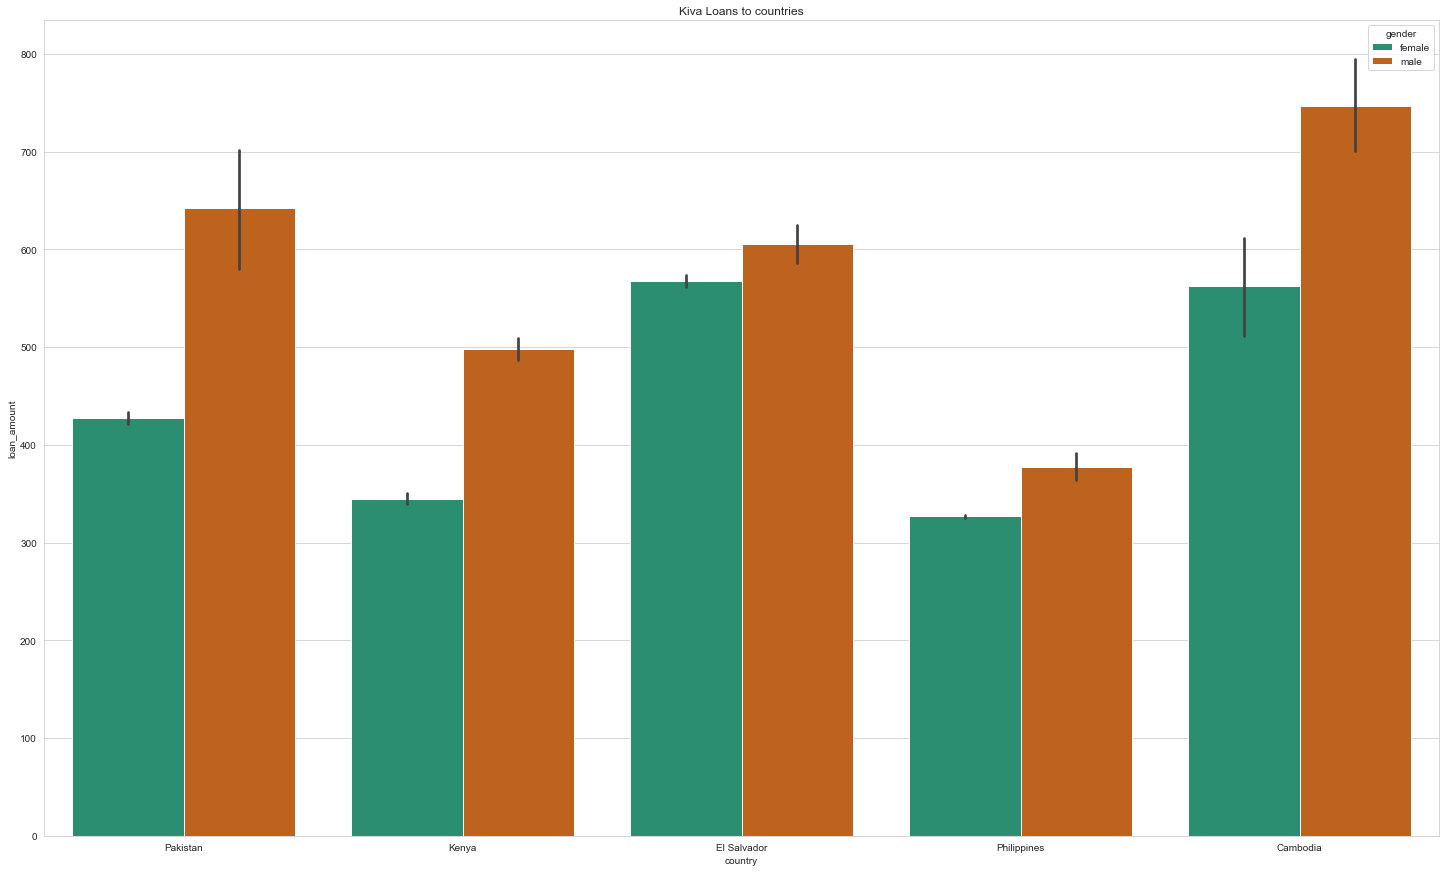

In [63]:
# Set color palette
sns.set_palette('Dark2')

# Set style
sns.set_style('whitegrid')

# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))

# Add a title
ax = plt.subplot()
ax.set_title("Kiva Loans to countries")

# Use Seaborn to create the bar plot
sns.barplot(data=df, x='country', y='loan_amount', hue='gender')


## Step 7: Box Plots With Kiva Data

So far you have visualized the average size of loans by country using bar charts; now you are going to make a box plot to compare the distribution of loans by country.

We have set up a figure for you to plot on. Use `sns.boxplot()` to compare the distribution of loan amounts by country for the Kiva dataset.   

`sns.boxplot()` can be passed the same parameters as `sns.barplot()`.

**Optional:** You may set a new color palette if you would like to continue using `sns.set_palette()`.


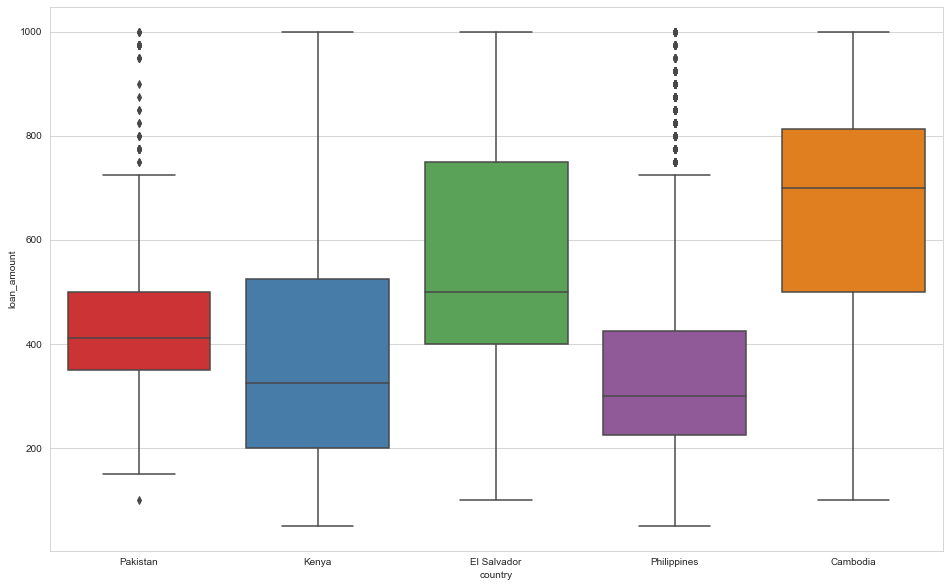

In [78]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='country', y='loan_amount', palette='Set1')



#### Reflection Questions

Which country's box has the widest distribution?

In [69]:
# El salvador

In which country would you be most likely to receive the largest loan amount?

In [70]:
# Cambodia

## Step 8: Box Plot by Activity

Instead of visualizing the loan amount by *country*, use `sns.boxplot()` to plot the loan amount by *activity*.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
You can use the same code as the box plot above, but the `x` parameter should be set to `"activity"`.
<br>
</details>
 
**Optional:** Set a different plot style and color palette to best visualize this data.

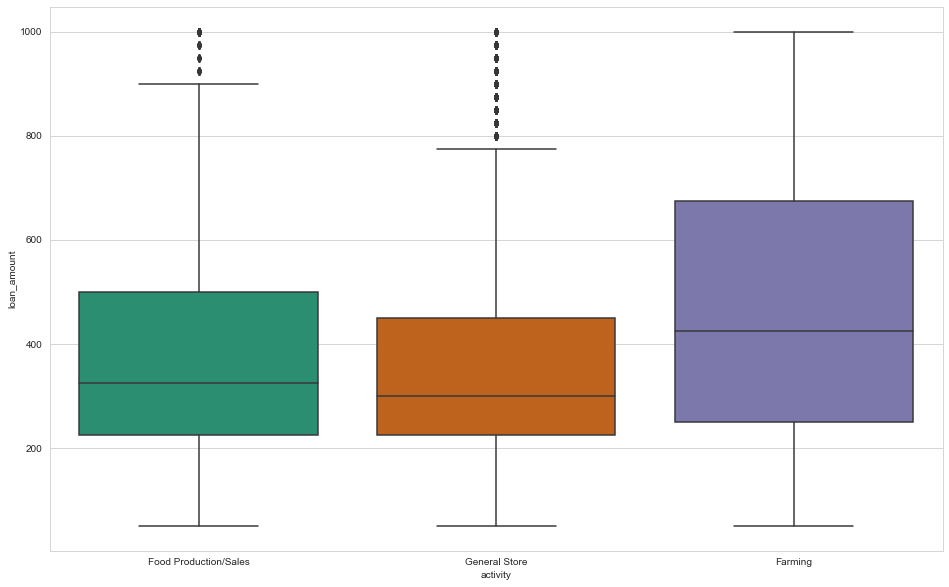

In [73]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=df, x='activity', y='loan_amount')


#### Reflection Questions

What does this visualization reveal that previous ones did not?

In [ ]:
# Most of the loan amounts are for farming while General Store activity has the least amount

## Step 9: Violin Plots

You can use nearly identical syntax (as you have used for box plots) to create violin plots. Take this line of code from above:

```python
sns.boxplot(data=df, x="activity", y="loan_amount")
```

To visualize the distribution of the exact same data as a violin plot you could pass the same parameters to `sns.violinplot()` instead of `sns.boxplot()`.

Change the code in the cell below so that the data is plotted as a violin plot instead of a barplot.

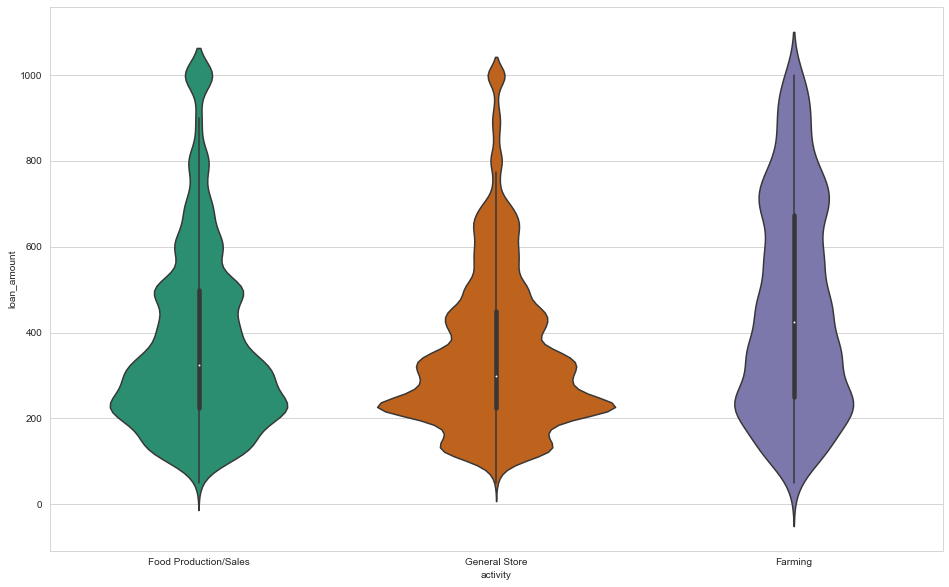

In [75]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x="activity", y="loan_amount")

### Create a violin plot that visualizes the distribution of loan amount by country.
Previously, you created a violin plot and plotted the data by _activity_. This time, create a violin plot that plots the data by _country_.

<br>
<details>
<summary>Hint</summary>
<br>
Change the value of the `x` argument passed into the `violinplot()` function.
<br>
</details>

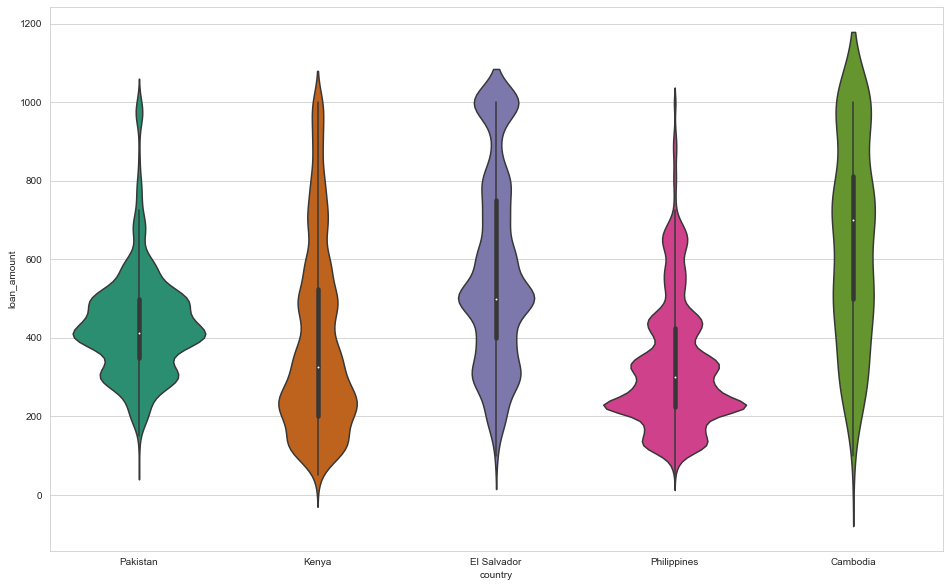

In [76]:
plt.figure(figsize=(16, 10))
sns.violinplot(data = df, x='country', y='loan_amount')

## Step 10: Split Violin Plots

Use the `hue` and `split` parameters with `sns.violinplot()` to visualize the distribution of loan amount by country, split by gender. 

<br>
<details>
<summary>Hint</summary>
<br>
The argument `hue` should be set to `"gender"` and `split` should equal `True`. 
<br>
</details>

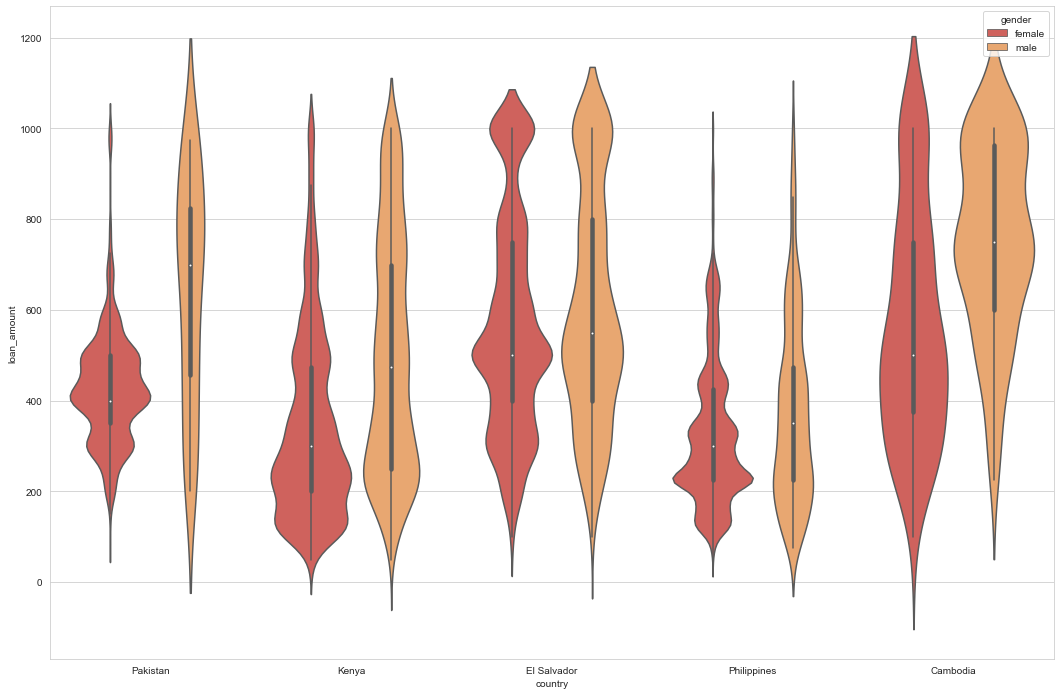

In [77]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")
plt.figure(figsize=(18, 12))
sns.violinplot(data=df, x='country', y='loan_amount', hue='gender')

#### Reflection Questions

What does this visualization reveal about the distribution of loan amounts within countries by gender?

In [ ]:
# Most of the female gender falls towards median of the violinplot

## You're done! Congratulations!

You used Seaborn to visualize insights using a dataset from Kaggle. You explored the average loan amount by country using aggregated bar charts, box plots, and violin plots. You also nested the data by gender, allowing you to draw additional insights from your charts. Congratulations!

### How do you feel?

In [ ]:
# Giddy